✅ Image found: C:\Users\mar4u\Documents\DS-Test-2025\task2\test_amimal.jpg
✅ Model found: C:\Users\mar4u\Documents\DS-Test-2025\task2\models\animal_classifier_final.keras

Top 3 predictions:
dog: 99.89%
butterfly: 0.07%
sheep: 0.02%


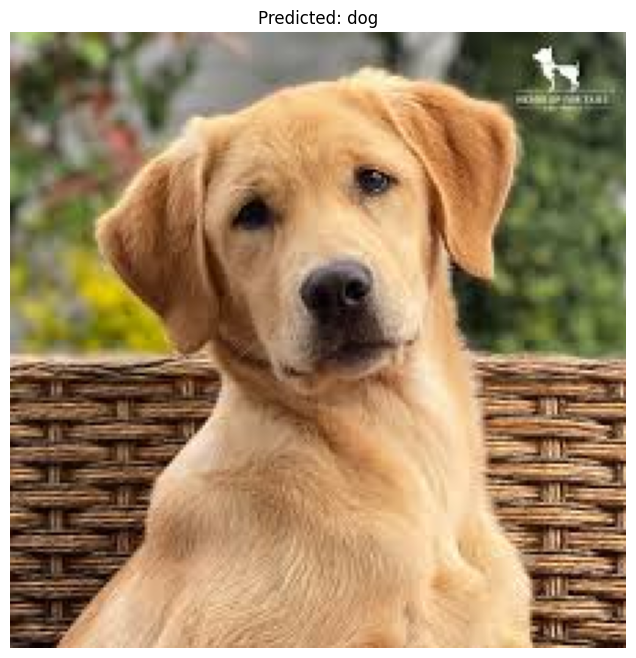

In [12]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras import layers, models

# Define paths
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
image_path = os.path.join(BASE_DIR, "test_amimal.jpg")
model_path = os.path.join(BASE_DIR, "models", "animal_classifier_final.keras")

# Check if files exist
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at {image_path}")
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model not found at {model_path}")

print("✅ Image found:", image_path)
print("✅ Model found:", model_path)

# Define class names
class_names = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

def create_model():
    # Load base model
    base_model = ResNet50(
        input_shape=(224, 224, 3),
        include_top=False,
        weights="imagenet"
    )
    
    # Freeze base model layers
    base_model.trainable = False
    
    # Build model architecture
    model = models.Sequential([
        # Base model
        base_model,
        
        # Classification head
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(len(class_names), activation='softmax')
    ])
    
    return model

def predict_image(image_path, model, class_names):
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Apply preprocessing
    img_array = preprocess_input(img_array)
    
    # Make prediction
    predictions = model.predict(img_array, verbose=0)
    
    # Get top 3 predictions
    top_3_idx = np.argsort(predictions[0])[-3:][::-1]
    
    print("\nTop 3 predictions:")
    for idx in top_3_idx:
        print(f"{class_names[idx]}: {predictions[0][idx]*100:.2f}%")
    
    return class_names[np.argmax(predictions[0])]

def visualize_prediction(image_path, model, class_names):
    img = image.load_img(image_path, target_size=(224, 224))
    prediction = predict_image(image_path, model, class_names)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {prediction}")
    plt.show()

# Create new model with same architecture
new_model = create_model()

# Enable unsafe deserialization and load the old model
tf.keras.config.enable_unsafe_deserialization()
old_model = tf.keras.models.load_model(model_path)

# Copy weights from old model to new model
# Skip the first layer (Lambda) when copying weights
for new_layer, old_layer in zip(new_model.layers, old_model.layers[1:]):
    new_layer.set_weights(old_layer.get_weights())

# Test the model
visualize_prediction(image_path, new_model, class_names)